<a href="https://colab.research.google.com/github/Juniorbasck/Machine-Learning-Tree-SVM-Regression-/blob/main/Tree-SVM-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = '/content/heart.csv'
heart_data = pd.read_csv(url)

heart_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.62376

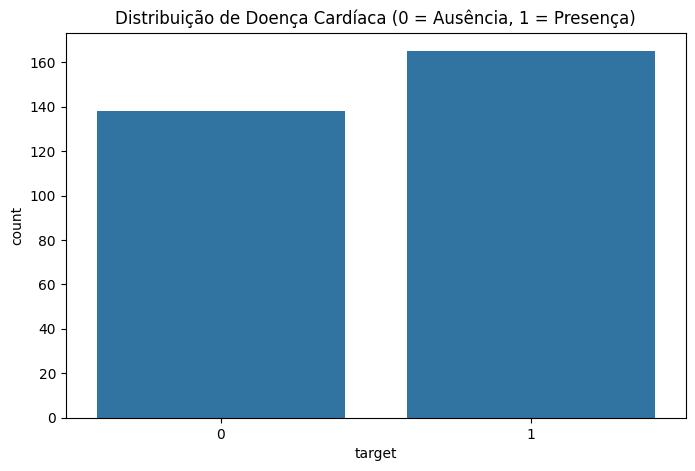

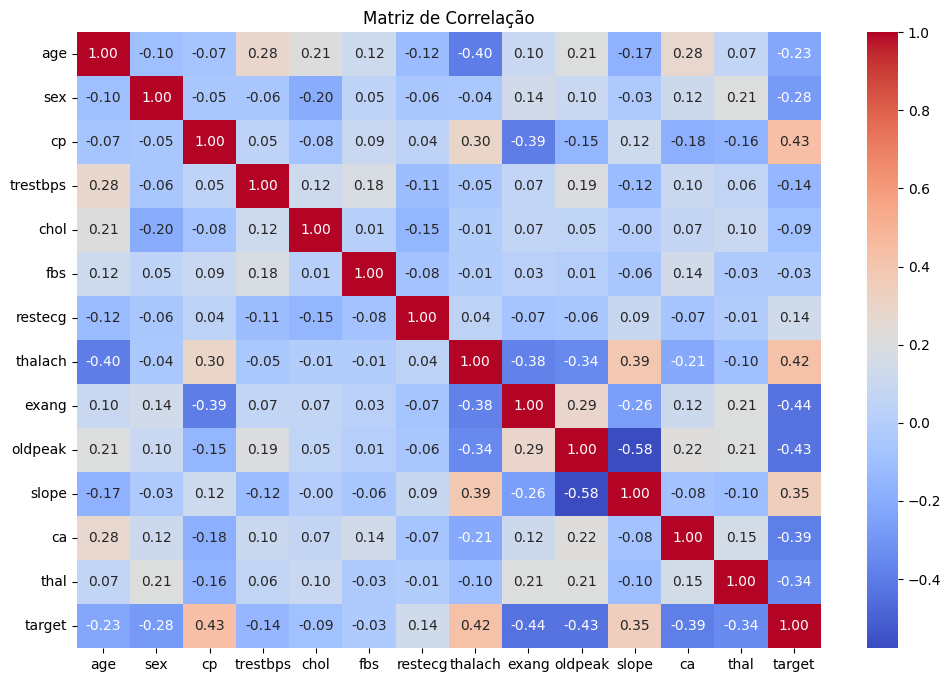

In [5]:
def eda_summary(data):
    print(data.info())

    print(data.describe())

    print("Valores nulos:\n", data.isnull().sum())

    plt.figure(figsize=(8, 5))
    sns.countplot(x='target', data=data)
    plt.title("Distribuição de Doença Cardíaca (0 = Ausência, 1 = Presença)")
    plt.show()

    plt.figure(figsize=(12, 8))
    sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Matriz de Correlação")
    plt.show()

eda_summary(heart_data)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = heart_data.drop(columns='target')
y = heart_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print(f'Accuracy Regressão Logística: {accuracy_score(y_test, y_pred_log)}')

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
print(f'Accuracy Árvore de Decisão: {accuracy_score(y_test, y_pred_tree)}')

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print(f'Accuracy SVM: {accuracy_score(y_test, y_pred_svm)}')


Accuracy Regressão Logística: 0.8688524590163934
Accuracy Árvore de Decisão: 0.819672131147541
Accuracy SVM: 0.7049180327868853


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Modelo: {model_name}")
    print(f" - Acurácia: {accuracy:.4f}")
    print(f" - Precisão: {precision:.4f}")
    print(f" - Recall: {recall:.4f}")
    print(f" - F1-Score: {f1:.4f}")
    print("\n")

# Avaliar cada modelo
evaluate_model(y_test, y_pred_log, "Regressão Logística")
evaluate_model(y_test, y_pred_tree, "Árvore de Decisão")
evaluate_model(y_test, y_pred_svm, "SVM")


Modelo: Regressão Logística
 - Acurácia: 0.8689
 - Precisão: 0.8750
 - Recall: 0.8750
 - F1-Score: 0.8750


Modelo: Árvore de Decisão
 - Acurácia: 0.8197
 - Precisão: 0.9200
 - Recall: 0.7188
 - F1-Score: 0.8070


Modelo: SVM
 - Acurácia: 0.7049
 - Precisão: 0.6667
 - Recall: 0.8750
 - F1-Score: 0.7568


